In [10]:
from sklearn.datasets import fetch_20newsgroups

# Load the full 20 Newsgroups dataset
newsgroups = fetch_20newsgroups(subset='all')
data = newsgroups.data

In [11]:
import pandas as pd

# Create a DataFrame to analyze the data
df = pd.DataFrame(data, columns=["text"])

# Display basic statistics about the dataset
print(df.describe())

                                                     text
count                                               18846
unique                                              18846
top     From: chriss@netcom.com (Chris Silvester)\nSub...
freq                                                    1


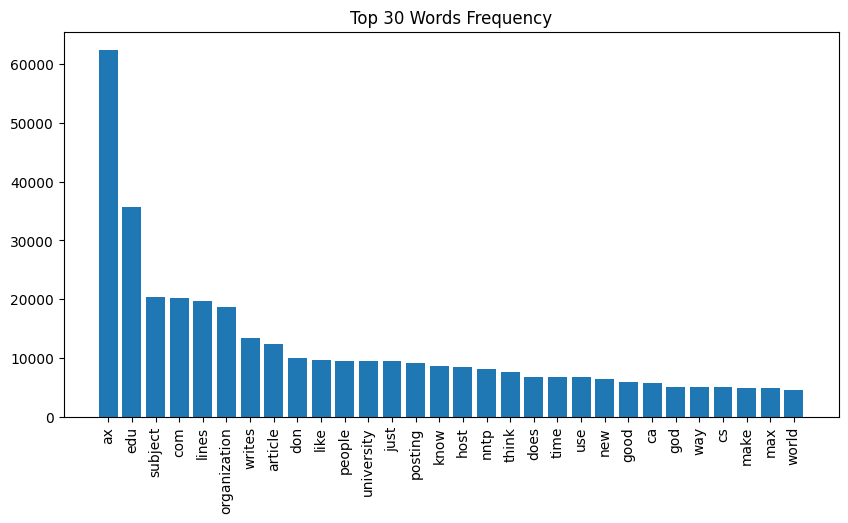

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

# Vectorize the text data to count word occurrences
vectorizer = CountVectorizer(stop_words='english')
X_counts = vectorizer.fit_transform(data)

# Sum up the counts of each word in the vocabulary
word_counts = X_counts.toarray().sum(axis=0)
word_freq = [(word, word_counts[idx]) for word, idx in vectorizer.vocabulary_.items()]
word_freq = sorted(word_freq, key=lambda x: x[1], reverse=True)

# Plot the top 30 most frequent words
words = [wf[0] for wf in word_freq[:30]]
counts = [wf[1] for wf in word_freq[:30]]
plt.figure(figsize=(10, 5))
plt.bar(words, counts)
plt.xticks(rotation=90)
plt.title("Top 30 Words Frequency")
plt.show()

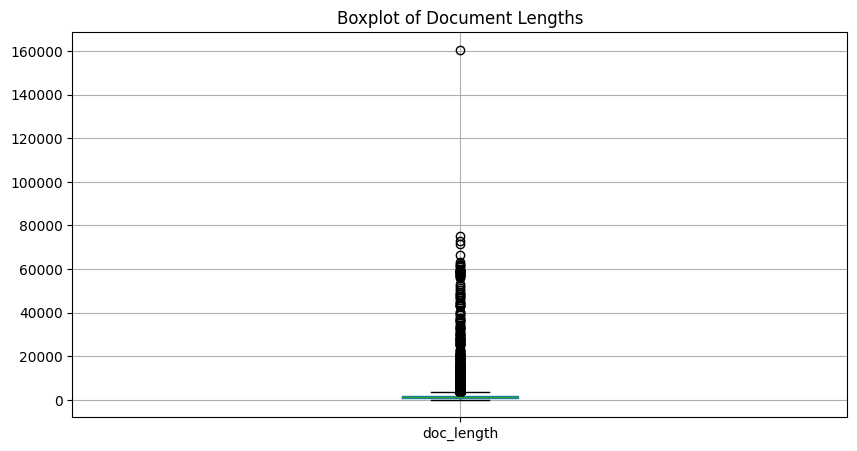

In [13]:
# Calculate the length of each document
df['doc_length'] = df['text'].apply(len)

# Plot a boxplot of document lengths
plt.figure(figsize=(10, 5))
df.boxplot(column='doc_length')
plt.title("Boxplot of Document Lengths")
plt.show()

In [14]:
import re
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import nltk

nltk.download('stopwords')

# Initialize stemmer and stopwords
stemmer = SnowballStemmer("english")
stop_words = set(stopwords.words('english'))

# Function to preprocess text
def preprocess_text(text):
    text = re.sub(r'\W+', ' ', text)
    text = re.sub(r'\d+', '', text)
    text = text.lower()
    text = ' '.join([stemmer.stem(word) for word in text.split() if word not in stop_words])
    return text

# Apply preprocessing to the text data
df['clean_text'] = df['text'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Transform the cleaned text data to TF-IDF features
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(df['clean_text'])

In [26]:
from sklearn.cluster import KMeans

# Apply K-Means with a predetermined number of clusters
num_clusters = 50
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X_tfidf)

# Get the cluster assignments
labels_kmeans = kmeans.labels_
df['cluster_kmeans'] = labels_kmeans

In [27]:
from sklearn.metrics import silhouette_score

# Calculate silhouette scores for each clustering algorithm
sil_score_kmeans = silhouette_score(X_tfidf, labels_kmeans)

print(f'Silhouette Score for K-Means: {sil_score_kmeans}')


Silhouette Score for K-Means: 0.018133126298180004


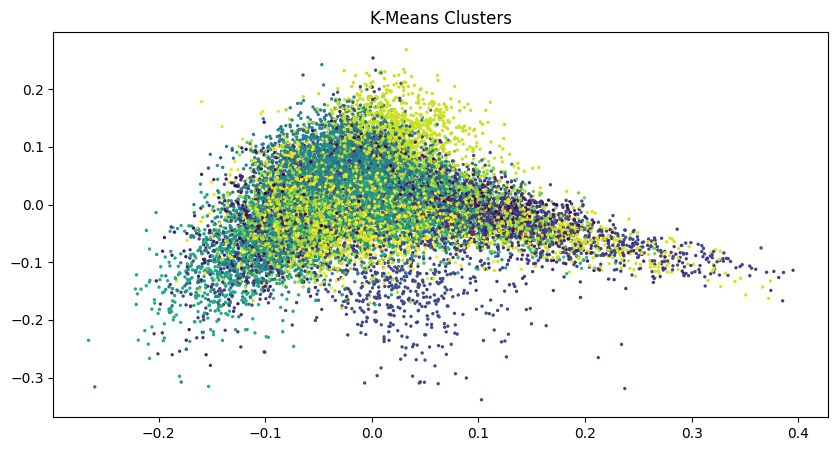

In [28]:
from sklearn.decomposition import PCA

# Function to plot clusters
def plot_clusters(X_pca, labels, title):
    plt.figure(figsize=(10, 5))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=2)
    plt.title(title)
    plt.show()

# Reduce dimensions to 2 for visualization
X_pca = PCA(n_components=2).fit_transform(X_tfidf.toarray())

# Visualize clusters
plot_clusters(X_pca, labels_kmeans, 'K-Means Clusters')
